Deep Learning using Rectified Linear Units
====

## Overview

In this notebook, we explore the performance of a neural net with varying activation functions on a text classification task.

We load our dependencies.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

__version__ = '1.0.0'
__author__ = 'Abien Fred Agarap'

import csv
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

from neural_net import NeuralNet
from utils import tokenize_text, remove_stopwords, load_embeddings

We set up the GPU memory growth.

In [2]:
tf.config.experimental.set_memory_growth(
    tf.config.experimental.list_physical_devices('GPU')[0], True
)

We set the random seeds for reproducibility.

In [3]:
np.random.seed(42)
tf.random.set_seed(42)

We set the batch size, the number of epochs, and the number of units per layer.

In [4]:
batch_size = 64
epochs = 500
neurons = [512, 256]

Let's define an embedding initializer.

In [8]:
def my_initializer(shape=None, dtype=tf.float32, partition_info=None):
    assert dtype is tf.float32
    return embedding_matrix

## Data Preparation

We load the IMDB sentiment classification dataset.

In [9]:
reviews, labels = load_data("../assets/dataset/imdb.csv")

We filter out the stop words.

In [10]:
reviews = [remove_stopwords(review) for review in reviews]

Now that we have our features and labels, we can use the utility functions to vectorize the features, and load our embedding matrix.

In [11]:
features, vocabulary, vocabulary_size, tokenizer = tokenize_text(reviews)

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, stratify=labels, test_size=0.2, shuffle=True
)

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

embedding_matrix = load_embeddings(
    filename='../assets/glove.6B.50d.txt', vocabulary_size=vocabulary_size, tokenizer=tokenizer, max_length=50
)

[INFO] Loaded word vectors : 400000
[INFO] Loaded word vectors for vocabulary with size : 3092


Now that we have our vectorized features and onehot-encoded labels, we can now create a dataset object for our model.

In [12]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
train_dataset = train_dataset.batch(batch_size, True)
train_dataset = train_dataset.prefetch(batch_size * 4)
train_dataset = train_dataset.shuffle(train_features.shape[0])

## Model

We use a 2-layer Neural Network, and vary its activation function and initializer.

### Logistic-based Model

We define a 2-layer NN with Logistic activation function.

In [14]:
model = NeuralNet(
    vocabulary_size=vocabulary_size,
    max_length=50,
    embedding_initializer=my_initializer,
    units=neurons,
    activation=tf.nn.sigmoid,
    initializer='glorot_uniform',
    num_classes=2
)

After defining our model, we shall now compile it for training.

In [15]:
model.compile(
    loss=tf.losses.binary_crossentropy,
    optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum=9e-1),
    metrics=['accuracy']
)

Perform a forward pass to call `model.summary()` after.

In [16]:
model(train_features[:batch_size]).shape

TensorShape([64, 2])

Display the model summary.

In [17]:
model.summary()

Model: "neural_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  154600    
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  1280512   
_________________________________________________________________
dense_1 (Dense)              multiple                  131328    
_________________________________________________________________
dense_2 (Dense)              multiple                  514       
Total params: 1,566,954
Trainable params: 1,412,354
Non-trainable params: 154,600
_________________________________________________________________


Train our model for 500 epochs

In [18]:
logistic_performance = model.fit(
    train_dataset, epochs=epochs, verbose=0,
)

Check for the model accuracy.

In [19]:
model.evaluate(test_features, test_labels, batch_size=batch_size, verbose=2)

200/1 - 0s - loss: 2.6574 - accuracy: 0.6450


[2.8212201404571533, 0.645]

### TanH-based Model

We define a 2-layer NN with Hyperbolic Tangent activation function.

In [20]:
model = NeuralNet(
    vocabulary_size=vocabulary_size,
    max_length=50,
    embedding_initializer=my_initializer,
    units=neurons,
    activation=tf.nn.tanh,
    initializer='glorot_uniform',
    num_classes=2
)

Compile the TanH-based model.

In [21]:
model.compile(
    loss=tf.losses.binary_crossentropy,
    optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum=9e-1),
    metrics=['accuracy']
)

Train the TanH-based model.

In [22]:
tanh_performance = model.fit(
    train_dataset, epochs=epochs, verbose=0
)

Check the model accuracy.

In [23]:
model.evaluate(test_features, test_labels, batch_size=batch_size, verbose=2)

200/1 - 0s - loss: 2.8910 - accuracy: 0.6575


[3.3519889640808107, 0.6575]

### ReLU-based Model

We define a 2-layer NN with ReLU activation function.

In [24]:
model = NeuralNet(
    vocabulary_size=vocabulary_size,
    max_length=50,
    embedding_initializer=my_initializer,
    units=neurons,
    activation=tf.nn.relu,
    initializer='he_uniform',
    num_classes=2
)

Compile the ReLU-based model.

In [25]:
model.compile(
    loss=tf.losses.binary_crossentropy,
    optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum=9e-1),
    metrics=['accuracy']
)

Train the ReLU-based model.

In [26]:
relu_performance = model.fit(
    train_dataset, epochs=epochs, verbose=0
)

Check the model accuracy.

In [27]:
model.evaluate(test_features, test_labels, batch_size=batch_size, verbose=2)

200/1 - 0s - loss: 1.8770 - accuracy: 0.7200


[1.8179836511611938, 0.72]

### Leaky ReLU-based Model

We define a 2-layer NN with Leaky ReLU activation function.

In [28]:
model = NeuralNet(
    vocabulary_size=vocabulary_size,
    max_length=50,
    embedding_initializer=my_initializer,
    units=neurons,
    activation=tf.nn.leaky_relu,
    initializer='he_normal',
    num_classes=2
)

Compile the Leaky ReLU-based model.

In [29]:
model.compile(
    loss=tf.losses.binary_crossentropy,
    optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum=9e-1),
    metrics=['accuracy']
)

Train the Leaky ReLU-based model.

In [30]:
lrelu_performance = model.fit(
    train_dataset, epochs=epochs, verbose=0
)

Check the model accuracy.

In [31]:
model.evaluate(test_features, test_labels, batch_size=batch_size, verbose=2)

200/1 - 0s - loss: 2.0201 - accuracy: 0.7275


[2.100040941238403, 0.7275]

### Softplus-based Model

We define a 2-layer NN with Softplus activation function.

In [32]:
model = NeuralNet(
    vocabulary_size=vocabulary_size,
    max_length=50,
    embedding_initializer=my_initializer,
    units=neurons,
    activation=tf.nn.softplus,
    initializer='he_normal',
    num_classes=2
)

Compile the Softplus-based model.

In [33]:
model.compile(
    loss=tf.losses.binary_crossentropy,
    optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum=9e-1),
    metrics=['accuracy']
)

Train the Softplus-based model.

In [34]:
softplus_performance = model.fit(
    train_dataset, epochs=epochs, verbose=0
)

Check the model accuracy.

In [35]:
model.evaluate(test_features, test_labels, batch_size=batch_size, verbose=2)

200/1 - 0s - loss: 3.1502 - accuracy: 0.6550


[3.801493453979492, 0.655]

### ELU-based Model

We define a 2-layer NN with ELU activation function.

In [36]:
model = NeuralNet(
    vocabulary_size=vocabulary_size,
    max_length=50,
    embedding_initializer=my_initializer,
    units=neurons,
    activation=tf.nn.elu,
    initializer='he_normal',
    num_classes=2
)

Compile the ELU-based model.

In [37]:
model.compile(
    loss=tf.losses.binary_crossentropy,
    optimizer=tf.optimizers.SGD(learning_rate=1e-2, momentum=9e-1),
    metrics=['accuracy']
)

Train the ELU-based model.

In [38]:
elu_performance = model.fit(
    train_dataset, epochs=epochs, verbose=0
)

Check the model accuracy.

In [39]:
model.evaluate(test_features, test_labels, batch_size=batch_size, verbose=2)

200/1 - 0s - loss: 2.9080 - accuracy: 0.6575


[3.4074255561828615, 0.6575]

## Training Performance

We lay down the training performance of each model.

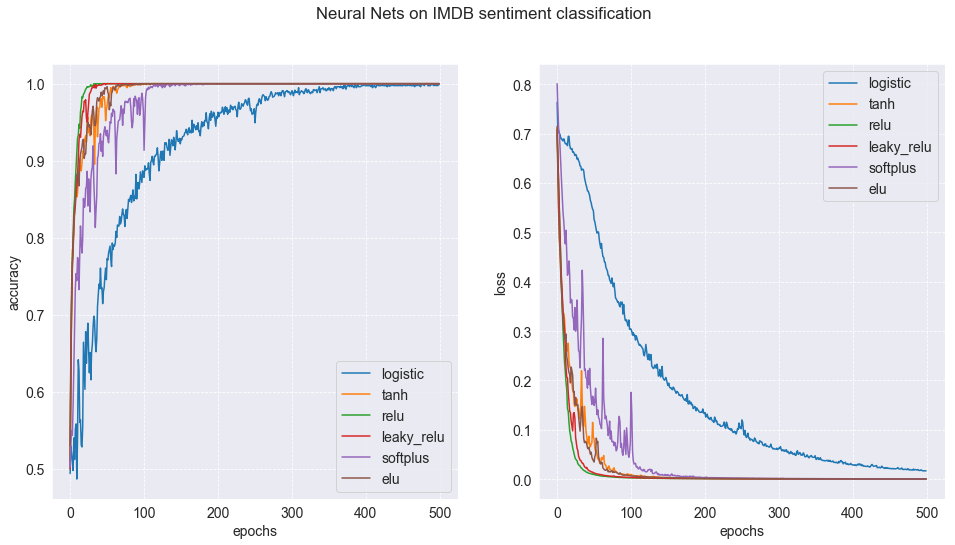

In [40]:
sns.set_style('dark', {'grid.linestyle': '--'})
plt.figure(figsize=(16, 8))
plt.rcParams.update({'font.size': 14})

plt.subplot(121)
plt.plot(
    range(len(logistic_performance.history['accuracy'])),
    logistic_performance.history['accuracy'],
    label='logistic'
)
plt.plot(
    range(len(tanh_performance.history['accuracy'])),
    tanh_performance.history['accuracy'],
    label='tanh'
)
plt.plot(
    range(len(relu_performance.history['accuracy'])),
    relu_performance.history['accuracy'],
    label='relu'
)
plt.plot(
    range(len(lrelu_performance.history['accuracy'])),
    lrelu_performance.history['accuracy'],
    label='leaky_relu'
)
plt.plot(
    range(len(softplus_performance.history['accuracy'])),
    softplus_performance.history['accuracy'],
    label='softplus'
)
plt.plot(
    range(len(elu_performance.history['accuracy'])),
    elu_performance.history['accuracy'],
    label='elu'
)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(122)
plt.plot(
    range(len(logistic_performance.history['loss'])),
    logistic_performance.history['loss'],
    label='logistic'
)
plt.plot(
    range(len(tanh_performance.history['loss'])),
    tanh_performance.history['loss'],
    label='tanh'
)
plt.plot(
    range(len(relu_performance.history['loss'])),
    relu_performance.history['loss'],
    label='relu'
)
plt.plot(
    range(len(lrelu_performance.history['loss'])),
    lrelu_performance.history['loss'],
    label='leaky_relu'
)
plt.plot(
    range(len(softplus_performance.history['loss'])),
    softplus_performance.history['loss'],
    label='softplus'
)
plt.plot(
    range(len(elu_performance.history['loss'])),
    elu_performance.history['loss'],
    label='elu'
)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.grid()

plt.suptitle('Neural Nets on IMDB sentiment classification')
plt.savefig('imdb_experiments.png', dpi=300)
plt.show()